## Partie 1 : Nettoyage 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Chargement des données du site Openfoodfacts

data = pd.read_csv("en_openfoodfacts_org_products.csv", sep = '\t', encoding ='UTF-8', low_memory = False)

In [8]:
# Liste des différentes colonnes du Data Set

list(data.columns)

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'abbreviated_product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'packaging_text',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'origins',
 'origins_tags',
 'origins_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'allergens_en',
 'traces',
 'traces_tags',
 'traces_en',
 'serving_size',
 'serving_quantity',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_t

In [9]:
# Tableau résumé de chaque variables quantitatives. Ce tableau va nous permettre de connaître le remplissage de chaque 
# variable. Ceci nous permettra de sélectionner en fonction de leurs importances et/ou du nombres de valeurs manquantes, 
# si on garde une variable ou pas.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Résumé des données brutes
data.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutriscore_score,nova_group,ecoscore_score_fr,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.810639e+06,1.810639e+06,0.0,0.0,4.712700e+05,0.0,695471.000000,695471.000000,0.0,695471.000000,0.0,671260.000000,607700.000000,437366.000000,1.326430e+05,1.384567e+06,1.437612e+06,976.000000,1.429500e+06,1.386101e+06,25.000000,5.000000,5.000000,12.000000,16.000000,11.000000,2.300000e+01,9.000000,88.000000,34.000000,8.000000,9.000000,16.000000,12.000000,47529.000000,47519.00000,2006.000000,722.000000,120.00000,207.00000,519.000000,467.000000,111.000000,12.000000,7.000000,93.000000,59.000000,2.000000,23.000000,10.000000,6.000000e+00,1.000000e+01,264640.000000,268397.000000,1.429043e+06,1.412086e+06,150.000000,90.000000,81.000000,848.000000,44.000000,118.000000,507.000000,3595.000000,473051.000000,3609.000000,3339.000000,1.430546e+06,5.300000e+01,59.000000,29.000000,1.373480e+06,1.373476e+06,2.096500e+04,212314.000000,82.000000,9743.000000,3460.000000,1209.000000,220012.000000,23588.000000,22663.000000,23739.000000,15989.000000,10237.000000,8464.000000,1.275300e+04,1147.000000,6108.000000,132.000000,406.000000,92001.000000,756.000000,270059.000000,13795.000000,264662.000000,14697.000000,10209.000000,4307.000000,4069.000000,379.000000,2512.000000,200.000000,293.000000,2209.000000,453.000000,173.000000,190.000000,8792.000000,366.000000,11753.000000,313.000000,5966.000000,5.000000,470.000000,11703.000000,671265.000000,9.000000,4.000000,1.0,60.000000,1712.000000,32.000000,63.000000,38.000000
mean,1.553360e+09,1.588470e+09,NaN,NaN,2.357704e+16,NaN,2.041895,0.020623,NaN,0.069241,NaN,9.164787,3.430984,48.329904,5.025187e+37,6.343425e+06,4.636549e+36,360.180430,1.458808e+01,1.237423e+01,0.169833,9.678010,25.882620,87.578417,20.183994,27.882826,1.121722e+02,49.233111,20.871002,7.289559,33.528396,2.447952,34.451488,0.237691,9.947429,5.

In [10]:
# Suppression des colonnes inutiles
# On ne garde que les variables du code bar, de l'url du produit, de son nom, de ses catégories par les pnns_groups, de son pays
# son score au nutriscore, du nova group, du ecoscore et des ses variables nutritionnels principales 

for c in data.columns:
    if c not in ['code','url','product_name','pnns_groups_1','pnns_groups_2','countries','energy-kcal_100g',
                 'nutriscore_score', 'nova_group' , 'ecoscore_grade_fr', 'energy_100g', 'fat_100g', 
                 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g', 
                 'sodium_100g','fiber_100g','fruits-vegetables-nuts_100g']:
        del data[c]

## Partie 2 : Traitement des outliers et des valeurs manquantes¶


In [11]:
# Définition d'une fonction de remplacement par la valeur moyenne

def mean(value, replacement):
    if pd.isnull(value):
        return replacement
    return value

In [12]:
# Je crée une nouvelle colonne qui va calculer le nombre de variables remplies pour chaque produit.
# Je défini qu'en dessous de 13 variables, je ne considère pas le produit dans l'exploitation

data["Nombres"] = data.apply(lambda x: x.count(), axis=1)
data = data[data["Nombres"]>=13]

In [13]:
# Je crée une nouvelle variable que j'ai appelé 100g. Elle additionne tous les nutriments. Cette variable va me permettre de 
# supprimer certains outliers. Les nutriments étant rempli pour 100g, si la variable 100g est plus grande que 100g, cela veut dire
# que le produit a été mal renseigné 

data["100g"] = data["carbohydrates_100g"] + data["salt_100g"] + data["fat_100g"] + data["proteins_100g"]+ data["fiber_100g"] 

In [14]:
# Je remplace les valeurs manquantes de fiber par la moyenne 

mean_fiber = data['fiber_100g'].mean()
data['fiber_100g'] = [mean(t, mean_fiber) for t in data['fiber_100g']]

In [15]:
# Je supprime tous les outliers. Une valeur d'un nutriment ne peut pas dépasser 100g pour 100g de produit

data= data[data["sugars_100g"]<=100]
data= data[data["sodium_100g"]<=100]
data= data[data["proteins_100g"]<=100]
data= data[data["carbohydrates_100g"]<=100]
data= data[data["fat_100g"]<=100]
data= data[data["fiber_100g"]<=100]
data= data[data["salt_100g"]<=100]
data= data[data["saturated-fat_100g"]<=100]

In [16]:
# J'applique ma nouvelle variable 100g

data= data[data["100g"]<=100]

In [17]:
# Je supprime toutes les valeurs aberrantes en énergie également 

data= data[data["energy_100g"]<=10000]
data= data[data["energy-kcal_100g"]<=2500]

# C'était la première solution que j'avais décidé de considérer. Mais n'ayant pas de valeurs limite comme pour les nutriments,
# j'ai finalement décidé d'utiliser une autre méthode.

In [18]:
# Pour mieux limiter les données en énergies, j'ai donc décidé d'utiliser les quartiles et l'écart interquartile quartile 
# pour donner une borne supérieur aux énergies

for c in data.columns:
    if c in ['energy-kcal_100g', 'energy_100g']:
        subset = data[c] # Création du sous-échantillon
        #On calcule Q1

        q1=subset.quantile(q=0.25)

        #On calcule Q3

        q3=subset.quantile(q=0.75)

        #On calcule l'écart interquartile (IQR)

        IQR=q3-q1

        #On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile

        borne_sup = q3 +1.5*IQR

        #On garde les valeurs à l'intérieur de la borne inférieure et supérieure

        data= data[data[c]<borne_sup]

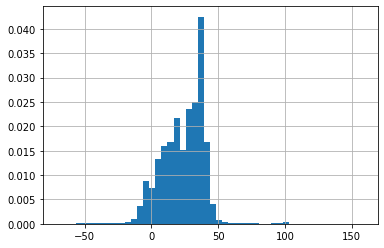

In [19]:
# Dans un premier temps, j'ai voulu gardé les données en % de fruits, légumes et noix. Cette variable rentre en compte dans le 
# calcul du nutriscore. J'ai voulu imputer les valeurs manquantes à partir des données disponibles.


# Imputation des valeurs manquantes de fruits and vegetables

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

data_fit = data[['energy_100g','energy-kcal_100g','fat_100g','carbohydrates_100g', 'sugars_100g',
                 'proteins_100g','salt_100g', 'sodium_100g','fiber_100g','fruits-vegetables-nuts_100g']]

data_fit = data_fit[data_fit['fruits-vegetables-nuts_100g'].notna()]


imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(data_fit)
IterativeImputer(random_state=0)

data_test = data[['energy_100g','energy-kcal_100g','fat_100g','carbohydrates_100g', 'sugars_100g',
                 'proteins_100g','salt_100g', 'sodium_100g','fiber_100g','fruits-vegetables-nuts_100g']]

data_corrige = np.round(imp.transform(data_test))


data['fruits-vegetables-nuts_100g'] = [data_corrige[t,9] for t in range(len(data))]

subset = data['fruits-vegetables-nuts_100g'] # Création du sous-échantillon
subset.hist(density=True,bins=50) # Crée l'histogramme
plt.show()

# J'ai finalement décidé, de ne pas inclure dans mes données cette variable. 
# Il n'y a pas assez de données et l'imputation retournait des valeurs aberrantes (inférieur à 0)

In [20]:
del data['fruits-vegetables-nuts_100g']

## Partie 3 : Traitement des variables qualitatives 

In [21]:
# Définissions de la fonction qui sélectionne une valeur dans une variable quantitative 

def first(string):
    parts = string.split(',')
    first_part = parts[0]
    if len(parts) >= 2:
        print(' - Il y a plusieurs parties dans "{}", ne gardons que {}.'\
            .format(parts,first_part))  
    return first_part

In [22]:
# Je commence à traiter les deux colonnes countries et pnns_groups_1
# Je remplace d'abord les valeurs non renseignés par autres, et je ne garde qu'un seul pays pour chaque produit

data["countries"] = data["countries"].fillna("Autres")
data["pnns_groups_1"] = data["pnns_groups_1"].fillna("Autres")
data['countries'] = data['countries'].apply(first)

 - Il y a plusieurs parties dans "['États-Unis', ' en:france']", ne gardons que États-Unis.
 - Il y a plusieurs parties dans "['États-Unis', ' en:france']", ne gardons que États-Unis.
 - Il y a plusieurs parties dans "['France', ' United States']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', 'Belgique']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', 'Belgique']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' États-Unis']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', 'Switzerland']", ne gardons que France.
 - Il y a plusieurs parties dans "['Belgique', 'France']", ne gardons que Belgique.
 - Il y a plusieurs parties dans "['Belgique', 'France']", ne gardons que Belgique.
 - Il y a plusieurs parties dans "['Belgique', 'France']", ne gardons que Belgique.
 - Il y a plusieurs parties dans "['France', 'Belgique']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', 'Belgique']", n

 - Il y a plusieurs parties dans "['France', 'Royaume-Uni']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' Royaume-Uni']", ne gardons que France.
 - Il y a plusieurs parties dans "['en:fr', ' United States']", ne gardons que en:fr.
 - Il y a plusieurs parties dans "['France', ' United States']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', 'United Kingdom']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' Royaume-Uni']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' Royaume-Uni']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' Royaume-Uni']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', 'United Kingdom']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' United Kingdom']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' Royaume-Uni']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', '

 - Il y a plusieurs parties dans "['Bélgica', 'Francia', 'España']", ne gardons que Bélgica.
 - Il y a plusieurs parties dans "['Belgium', 'France']", ne gardons que Belgium.
 - Il y a plusieurs parties dans "['France', ' en:belgium']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', 'Switzerland']", ne gardons que France.
 - Il y a plusieurs parties dans "['Belgium', 'France', 'Switzerland']", ne gardons que Belgium.
 - Il y a plusieurs parties dans "['France', 'Switzerland', ' en:spain', ' en:belgium']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', 'Nouvelle-Calédonie', 'La Réunion', 'Suisse', 'en:france']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' en:martinique']", ne gardons que France.
 - Il y a plusieurs parties dans "['Union européenne', ' France']", ne gardons que Union européenne.
 - Il y a plusieurs parties dans "['France', 'Suisse']", ne gardons que France.
 - Il y a plusieurs parties dans "['Belgium', '

 - Il y a plusieurs parties dans "['France', ' Guadeloupe']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', 'Poland', 'Spain']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' en:martinique']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' Polynésie française']", ne gardons que France.
 - Il y a plusieurs parties dans "['Francia', 'España']", ne gardons que Francia.
 - Il y a plusieurs parties dans "['Francia', 'España']", ne gardons que Francia.
 - Il y a plusieurs parties dans "['France', ' España']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' en:french-polynesia']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' en:italy']", ne gardons que France.
 - Il y a plusieurs parties dans "['Belgique', 'France']", ne gardons que Belgique.
 - Il y a plusieurs parties dans "['France', 'Espagne']", ne gardons que France.
 - Il y a plusieurs parties dans "['Belgique', 'France']"

 - Il y a plusieurs parties dans "['Deutschland', 'Vereinigte Staaten von Amerika']", ne gardons que Deutschland.
 - Il y a plusieurs parties dans "['Deutschland', 'en:germany']", ne gardons que Deutschland.
 - Il y a plusieurs parties dans "['Deutschland', 'Irland']", ne gardons que Deutschland.
 - Il y a plusieurs parties dans "['Deutschland', 'Irland']", ne gardons que Deutschland.
 - Il y a plusieurs parties dans "['Deutschland', 'en:germany']", ne gardons que Deutschland.
 - Il y a plusieurs parties dans "['Deutschland', 'Irland']", ne gardons que Deutschland.
 - Il y a plusieurs parties dans "['Germany', 'en:germany']", ne gardons que Germany.
 - Il y a plusieurs parties dans "['Italien', 'Deutschland']", ne gardons que Italien.
 - Il y a plusieurs parties dans "['Deutschland', 'Irland']", ne gardons que Deutschland.
 - Il y a plusieurs parties dans "['Deutschland', 'Irland']", ne gardons que Deutschland.
 - Il y a plusieurs parties dans "['Deutschland', 'Irland']", ne gardons qu

 - Il y a plusieurs parties dans "['Belgien', 'Deutschland', 'Niederlande', 'Schweiz', 'en:germany']", ne gardons que Belgien.
 - Il y a plusieurs parties dans "['Austria', 'Belgium', 'France', 'Germany', 'Sweden', 'Switzerland']", ne gardons que Austria.
 - Il y a plusieurs parties dans "['Belgium', 'France', 'Germany', 'Netherlands', 'Sweden']", ne gardons que Belgium.
 - Il y a plusieurs parties dans "['Frankreich', 'Deutschland']", ne gardons que Frankreich.
 - Il y a plusieurs parties dans "['France', ' en:spain']", ne gardons que France.
 - Il y a plusieurs parties dans "['Germany', ' en:switzerland']", ne gardons que Germany.
 - Il y a plusieurs parties dans "['Austria', 'Belgium', 'France', 'Germany', 'Italy', 'Luxembourg', 'Netherlands', 'Portugal', 'Slovakia', 'Sweden', 'Switzerland', 'Belgien', 'Deutschland', 'Frankreich', 'Italien', 'Polen', 'Rumänien', 'Schweiz', 'Ungarn']", ne gardons que Austria.
 - Il y a plusieurs parties dans "['France', ' Germany', ' United Kingdom',

 - Il y a plusieurs parties dans "['France', 'Switzerland', 'en:switzerland']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' Switzerland']", ne gardons que France.
 - Il y a plusieurs parties dans "['Suisse', 'en:switzerland']", ne gardons que Suisse.
 - Il y a plusieurs parties dans "['Switzerland', 'Schweiz']", ne gardons que Switzerland.
 - Il y a plusieurs parties dans "['Switzerland', 'en:switzerland']", ne gardons que Switzerland.
 - Il y a plusieurs parties dans "['France', 'Suisse']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', 'Suisse', 'en:switzerland']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' Suisse']", ne gardons que France.
 - Il y a plusieurs parties dans "['France', ' Switzerland']", ne gardons que France.
 - Il y a plusieurs parties dans "['Suisse', 'en:switzerland']", ne gardons que Suisse.
 - Il y a plusieurs parties dans "['France', ' Switzerland']", ne gardons que France.
 - Il y a plusi

 - Il y a plusieurs parties dans "['Francia', 'España']", ne gardons que Francia.
 - Il y a plusieurs parties dans "['Suisse', ' en:fr']", ne gardons que Suisse.
 - Il y a plusieurs parties dans "['Frankreich', ' en:ch', ' en:italy']", ne gardons que Frankreich.
 - Il y a plusieurs parties dans "['Italia', 'en:italy']", ne gardons que Italia.
 - Il y a plusieurs parties dans "['France', 'Italy']", ne gardons que France.
 - Il y a plusieurs parties dans "['Frankreich', ' en:ch']", ne gardons que Frankreich.
 - Il y a plusieurs parties dans "['Frankreich', 'Deutschland', 'Italien']", ne gardons que Frankreich.
 - Il y a plusieurs parties dans "['Germany', 'Italy']", ne gardons que Germany.
 - Il y a plusieurs parties dans "['Kanada', ' en:de']", ne gardons que Kanada.
 - Il y a plusieurs parties dans "['Francia', 'en:italy']", ne gardons que Francia.
 - Il y a plusieurs parties dans "['Italia', 'Spagna']", ne gardons que Italia.
 - Il y a plusieurs parties dans "['Francia', 'España']", n

 - Il y a plusieurs parties dans "['en:Netherlands', ' United States']", ne gardons que en:Netherlands.
 - Il y a plusieurs parties dans "['Nederland', 'en:netherlands']", ne gardons que Nederland.
 - Il y a plusieurs parties dans "['Bélgica', 'Croacia', 'Francia', 'Alemania', 'Irlanda', 'Países Bajos', 'Noruega', 'Polonia', 'España', 'Suiza', 'Reino Unido']", ne gardons que Bélgica.
 - Il y a plusieurs parties dans "['France', 'Norvège']", ne gardons que France.
 - Il y a plusieurs parties dans "['Belgique', 'France']", ne gardons que Belgique.
 - Il y a plusieurs parties dans "['Autriche', 'France', 'Allemagne', 'Royaume-Uni']", ne gardons que Autriche.
 - Il y a plusieurs parties dans "['Belgique', 'France']", ne gardons que Belgique.
 - Il y a plusieurs parties dans "['Belgien', 'Frankreich', 'Deutschland', 'Spanien']", ne gardons que Belgien.
 - Il y a plusieurs parties dans "['France', 'Germany', 'Netherlands', 'Spain', 'Switzerland']", ne gardons que France.
 - Il y a plusieurs 

In [23]:
from collections import Counter

def most_common_words(labels):
    counter = Counter(labels)
    for word in counter.most_common(100):
        print(word)

most_common_words(data['countries'].values)

('United States', 214051)
('France', 102728)
('España', 4401)
('Deutschland', 4176)
('Belgique', 3335)
('en:Germany', 2915)
('Suisse', 2857)
('Francia', 2664)
('United Kingdom', 1986)
('en:United States', 1932)
('Spain', 1894)
('Frankreich', 1881)
('Belgium', 1851)
('Italia', 1702)
('Switzerland', 1497)
('Italy', 1345)
('Canada', 1324)
('Thailand', 1222)
('Germany', 1192)
('en:fr', 1165)
('en:France', 1056)
('en:United Kingdom', 1053)
('en:Italy', 951)
('en:france', 782)
('Polska', 683)
('en:es', 591)
('México', 587)
('Autres', 538)
('en:Netherlands', 489)
('en:Canada', 482)
('us', 457)
('en:Austria', 420)
('en:Switzerland', 396)
('België', 382)
('Österreich', 380)
('Australia', 369)
('Ireland', 356)
('en:us', 350)
('Argentina', 317)
('Netherlands', 293)
('en:Mexico', 284)
('en:US', 281)
('États-Unis', 273)
('Portugal', 272)
('en:Poland', 267)
('Austria', 244)
('Nederland', 243)
('Schweiz', 233)
('Suomi', 233)
('en:Spain', 229)
('en:Finland', 226)
('România', 222)
('en:FR', 219)
('en:B

In [24]:
PAYS = {
    'France': 'FRANCE',
    'United States': 'US',
    'en:fr': 'FRANCE',
    'en:es': 'ESPAGNE',
    'España': 'ESPAGNE',
    'en:it': 'ITALIE',
    'en:france': 'FRANCE',
    'en:be': 'BELGIQUE',
    'Deutschland': 'ALLEMAGNE',
    'en:ch': 'SUISSE',
    'en:FR': 'FRANCE',
    'en:ca': 'CANADA',
    'en:gb':'UK',
    'en:us':'US',
    'en:Germany': 'ALLEMAGNE',
    'en:de':'ALLEMAGNE',
    'Francia': 'FRANCE',
    'Spain': 'ESPAGNE',
    'Suisse': 'SUISSE',
    'Belgique': 'BELGIQUE',
    'Frankreich': 'FRANCE',
    'en:BE':'BELGIQUE',
    'en:spain': 'ESPAGNE',
    'United Kingdom': 'UK',
    'Germany': 'ALLEMAGNE',
    'Belgium': 'BELGIQUE',   
    'Switzerland': 'SUISSE',
    'en:United States': 'US',
    'en:France': 'FRANCE',
    'Italia': 'ITALIE',
    'Canada':'CANADA',
    'Mexico':'MEXIQUE',
    'Italy': 'ITALIE',
    'en:CH':'SUISSE',
    'en:United Kingdom': 'UK',
    'en:Italy': 'ITALIE',
    'en:au':'AUTRICHE',
    'en:ie':'IRLANDE',
    'Polska':'POLOGNE',
    'Australia': 'AUSTRALIE',
    'Thailand':'THAILANDE',
    'Ireland':'IRELAND',
    'en:Canada':'CANADA',
    'en:lu':'LUXEMBOURG',
    'Sverige':'SUEDE',
    'en:Spain': 'ESPAGNE',
    'en:Austria':'AUTRICHE',
    'Österreich':'AUTRICHE',
    'en:Switzerland': 'SUISSE',
    'België':'BELGIQUE',
    'Portugal':'PORTUGAL',
    'Nederland':'PAYS-BAS',
    'en:Netherlands':'PAYS-BAS',
    'Argentina':'ARGENTINE',
    'en:Belgium': 'BELGIQUE',
    'Sweden':'SUEDE',
    'România':'ROUMANIE',
    'Suomi':'SUEDE',
    'Austria':'AUTRICHE',
    'us':'US',
    'Schweiz':'SUISSE',
    'en:Poland':'POLOGNE',
    'Netherlands':'PAYS-BAS',
    'Magyarország':'HONGRIE',
    'Frankrijk': 'FRANCE',
    'Allemagne':'ALLEMAGNE',
    'en:DE':'ALLEMAGNE',
    'en:pt':'PORTUGAL',
    'Belgien':'BELGIQUE',
    'en:Australia': 'AUSTRALIE',
    'États-Unis':'US',
    'en:US':'US',
    'Espagne': 'ESPAGNE',
    'Mexico':'MEXIQUE',
    'en:dz':'ALGERIE',
    'en:Mexico':'MEXIQUE',
    'en:Finland':'FINLANDE',
    'en:GB':'UK',
    'en:nl':'PAYS-BAS',
    'Bélgica': 'BELGIQUE',
    'Poland':'POLOGNE',
    'Royaume-Uni':'UK',
    'Czech Republic':'Czech',
    'en:Portugal':'PORTUGAL',
    'Luxembourg':'LUXEMBOURG',
    'Italie': 'ITALIE',
    'en:Sweden':'SUEDE',
    'en:CA':'CANADA'
}

In [25]:
most_common_words(data['pnns_groups_1'].values)

('unknown', 117343)
('Sugary snacks', 55809)
('Cereals and potatoes', 43114)
('Milk and dairy products', 32048)
('Composite foods', 27062)
('Fat and sauces', 24607)
('Fish Meat Eggs', 24587)
('Beverages', 20677)
('Fruits and vegetables', 20139)
('Salty snacks', 8273)
('fruits-and-vegetables', 4854)
('sugary-snacks', 1006)
('Autres', 716)
('cereals-and-potatoes', 25)
('salty-snacks', 5)


In [26]:
CATEGORIES = {     
    'unknow':'AUTRE',
    'Sugary snacks': 'PRODUITS SUCRES' ,           
    'Fish Meat Eggs': 'POISSON,VIANDE,OEUFS' ,             
    'Milk and dairy products': 'LAIT ET PRODUIT LAITIERS'  ,  
    'Cereals and potatoes': 'FECULENTS'   ,    
    'Fat and sauces': 'MATIERES GRASSE AJOUTEES'  ,            
    'Beverages': 'BOISSONS',                  
    'Composite foods': 'REPAS PREPARES',             
    'Fruits and vegetables':  'FRUITS ET LEGUMES',     
    'Salty snacks': 'PRODUITS SALEES',                
    'fruits-and-vegetables': 'FRUITS ET LEGUMES',      
    'sugary-snacks': 'PRODUITS SUCRES',                
    'cereals-and-potatoes':  'FECULENTS',          
    'salty-snacks':  'PRODUITS SALEES',                   
}

In [27]:
# Correction des noms de pays et catégories

def detect_words(values, dictionary):
    result = []
    for lib in values:
        operation_type = "AUTRE"
        for word, val in dictionary.items():
            if word in lib:
                operation_type = val
        result.append(operation_type)
    return result

data["countries"] = detect_words(data["countries"], PAYS)
data["pnns_groups_1"] = detect_words(data["pnns_groups_1"],CATEGORIES)

In [28]:
most_common_words(data['countries'].values)

('US', 218566)
('FRANCE', 110715)
('ALLEMAGNE', 8681)
('ESPAGNE', 7417)
('AUTRE', 7018)
('BELGIQUE', 6262)
('SUISSE', 5137)
('ITALIE', 4223)
('UK', 3313)
('CANADA', 1912)
('THAILANDE', 1268)
('POLOGNE', 1101)
('PAYS-BAS', 1027)
('SUEDE', 681)
('IRELAND', 454)
('PORTUGAL', 422)
('MEXIQUE', 403)
('ARGENTINE', 386)
('AUTRICHE', 383)
('FINLANDE', 226)
('ROUMANIE', 222)
('AUSTRALIE', 122)
('Czech', 117)
('HONGRIE', 113)
('LUXEMBOURG', 85)
('IRLANDE', 6)
('ALGERIE', 5)


In [29]:
most_common_words(data['pnns_groups_1'].values)

('AUTRE', 118059)
('PRODUITS SUCRES', 56815)
('FECULENTS', 43139)
('LAIT ET PRODUIT LAITIERS', 32048)
('REPAS PREPARES', 27062)
('FRUITS ET LEGUMES', 24993)
('MATIERES GRASSE AJOUTEES', 24607)
('POISSON,VIANDE,OEUFS', 24587)
('BOISSONS', 20677)
('PRODUITS SALEES', 8278)


In [30]:
# Enregistrement au format CSV
data.to_csv("data_nettoyees.csv",index=False)